<a href="https://colab.research.google.com/github/joaovictordds/EDA_Bank_XYZ/blob/main/Finance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise financeira**



A fintech XYZ nos contratou com o propóstio de analisar o comportamento dos clientes junto ao banco. Solicitou insights e informações referentes aos dados disponibilizados para a ação. Solicitou também um modelo para prever qual o score do cliente.

---

#### Download de bibliotecas e dados

In [ ]:
#Importação das bibliotecas
import pandas as pd
pd.set_option('display.max_columns', 30)
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Acesso aos dados (via csv)
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Credit Analysis/train.csv',low_memory=False)
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Credit Analysis/test.csv', low_memory=False)
# Combinando os dados
df = pd.concat([test, train])

#### **1. TRATAMENTO DOS DADOS (EDA)**

Realizar um tratamento de dados, ou Análise Exploratória de Dados (EDA), é de suma importância antes de iniciar qualquer análise mais aprofundada. Esta etapa permite aos analistas compreenderem a estrutura e a qualidade dos dados, identificarem padrões e tendências, além de detectarem possíveis anomalias ou valores ausentes. Ao explorar os dados, os pesquisadores podem tomar decisões informadas sobre quais técnicas analíticas utilizar e como interpretar os resultados de forma mais precisa. Além disso, uma EDA robusta ajuda a garantir a confiabilidade e a validade das conclusões obtidas a partir das análises posteriores, promovendo uma base sólida para a tomada de decisões fundamentadas.

---

Performing data preprocessing, or Exploratory Data Analysis (EDA), is of paramount importance before embarking on any deeper analysis. This stage allows analysts to understand the structure and quality of the data, identify patterns and trends, as well as detect potential anomalies or missing values. By exploring the data, researchers can make informed decisions about which analytical techniques to employ and how to interpret the results more accurately. Furthermore, robust EDA helps ensure the reliability and validity of conclusions drawn from subsequent analyses, fostering a solid foundation for informed decision-making.

---


In [ ]:
df.head(3).round(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,NaN
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,NaN
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997,NaN


Há muito a ser feito aqui; precisaremos detectar dados nulos, dados negativos, variáveis numéricas com caracteres, idades negativas, analisar a utilidade das colunas, realizar várias conversões, etc. Vamos começar. Cada procedimento será indicado com uma observação.

---
There is much to be done here; we will need to detect null data, negative data, numeric variables with characters, negative ages, analyze the usefulness of columns, perform various conversions, etc. Let's begin. Each procedure will be indicated with a note.

---


In [ ]:
df = df.drop('ID', axis=1) # Coluna del

In [ ]:
df['Customer_ID'] = pd.factorize(df['Customer_ID'])[0] # Fatoriza variaveis 'não-interpretáveis

In [ ]:
df['Age'] = df['Age'].str.replace('_', '') # Retirando caracteres das variaveis numéricas

In [ ]:
df = df.drop(df[(df['Age'] > 60)].index) #delete de 8 linhas

In [ ]:
df = df.drop('SSN', axis=1) # Coluna del

In [ ]:
#df['Type_of_Loan'].value_counts()
df = df.drop('Type_of_Loan', axis=1) # Coluna del

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '')

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype("float64") # conversão de df pra float

In [ ]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: Payment_Behaviour, dtype: int64

In [ ]:
df = df.drop(df[(df['Payment_Behaviour'] == '!@9#%8')].index) #poderia ter substituido pelo valor da moda

In [ ]:
df = df.drop(df[(df['Monthly_Balance'] == '__-333333333333333333333333333__')].index) #delete de uma linha

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype("float64") # conversão de df pra float

In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.slice(0, 2) # Retira todo o valor após o segunda caractere

In [ ]:
df.drop(['Total_EMI_per_month','Credit_History_Age','Name','Delay_from_due_date', 'Changed_Credit_Limit',	'Num_Credit_Inquiries'], axis=1, inplace= True)

Na companhia, ao fazer requisições do banco de dados via sql ou qualquer outra forma, pode optar por não chamar estas colunas, aqui no caso, como são datasets pequenos, disponibilizados na internet, vamos limpando as colunas.

In [ ]:
linhas_duplicadas = df.duplicated()
total_duplicatas = linhas_duplicadas.sum()
print("Total de linhas duplicadas:", total_duplicatas)

Total de linhas duplicadas: 0


In [ ]:
df.drop_duplicates(keep='first',inplace=True) # Excluindo duplicados - keep mantem o primeiro

In [ ]:
df = df.drop('Monthly_Inhand_Salary',axis=1)

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0) # preenchendo campos vazios com 0

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(0)

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(0)

In [ ]:
df['Age'] = df['Age'].astype("int") # conversão de df pra int

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

In [ ]:
df['Annual_Income'] = df['Annual_Income'].astype("float64") # conversão de df pra float

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype("float64") # conversão de df pra float

In [ ]:
df['Credit_Mix'].value_counts()

Standard    48135
Good        32081
_           26322
Bad         25052
Name: Credit_Mix, dtype: int64

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', 'Standard') #Substituição pelo dado da moda

As vezes a variavel nem será utilizada, porém , não podemos apagar todas essas informações.

In [ ]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype("float64") # conversão de df pra float

In [ ]:
df['Occupation'].value_counts()

_______          9277
Lawyer           8672
Architect        8428
Engineer         8358
Mechanic         8290
Accountant       8275
Scientist        8237
Developer        8198
Entrepreneur     8190
Teacher          8183
Media_Manager    8160
Journalist       8013
Doctor           7987
Manager          7861
Musician         7771
Writer           7690
Name: Occupation, dtype: int64

In [ ]:
df['Occupation'] = df['Occupation'].str.replace('_______'	, 'Others')

In [ ]:
df['Annual_Income'] = df['Annual_Income'].round(2)
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].round(2)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].round(2)
df['Monthly_Balance'] = df['Monthly_Balance'].round(2)

In [ ]:
df = df.drop(df[(df['Age'] > 100)].index) # 2453 rows
df = df.drop(df[(df['Age'] < 14)].index)  # 1184 rows

In [ ]:
#df.loc[df[''] > 10000000]
df = df.drop(df[(df['Annual_Income'] > 10000000)].index) # 755 rows

In [ ]:
# Apagando 28 linhas
df = df.drop(df[(df['Num_Bank_Accounts'] < 0)].index)

In [ ]:
# Variavel está confusa, relação qtde de cartoes ou numero do cartao
df = df.drop('Num_Credit_Card' , axis=1)

In [ ]:
tquartil = 20 # 2500 linhas
df.loc[df['Interest_Rate'] > 50, 'Interest_Rate'] = tquartil

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].astype("int64") # conversão de df pra float

In [ ]:
# Replace 4821 lines with -100 Loans
df.loc[df['Num_of_Loan'] < 0, 'Num_of_Loan'] = 0

In [ ]:
# Deletando 595 linhas com mais de 10 emprestimos
df = df.drop(df[(df['Num_of_Loan'] > 10)].index)

In [ ]:
# Replace 766 lines with -100 Delayed
df.loc[df['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = 0

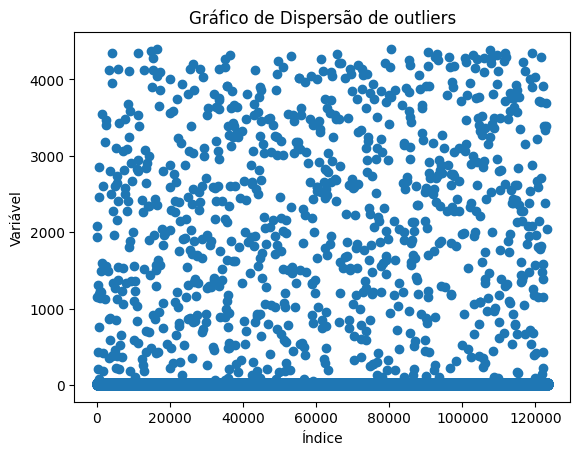

In [ ]:
plt.scatter(range(len(df['Num_of_Delayed_Payment'])), df['Num_of_Delayed_Payment'])
plt.title('Gráfico de Dispersão de outliers')
plt.xlabel('Índice')
plt.ylabel('Variável')
plt.show()

Decidi manter as linhas com pagamento em atraso pois não sei se a variavel refere-se à quantidade de dias em atraso.

In [ ]:
#Preenchendo os valores nulos com a média
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(30)

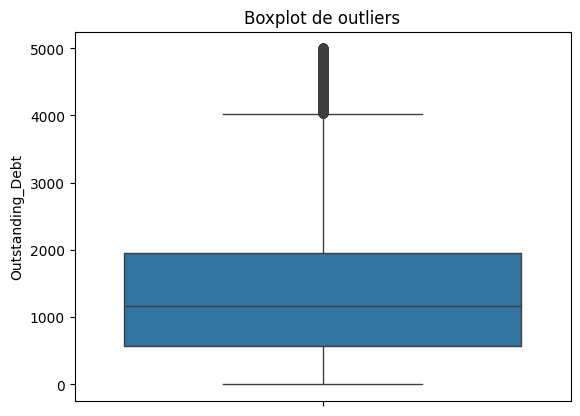

In [ ]:
# Supondo que 'data' seja o DataFrame contendo sua variável
sns.boxplot(df['Outstanding_Debt'])
plt.title('Boxplot de outliers')
plt.show()

Há 6569 débitos 'fora do comum', decidi manter a base toda.

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('NM', 'No')

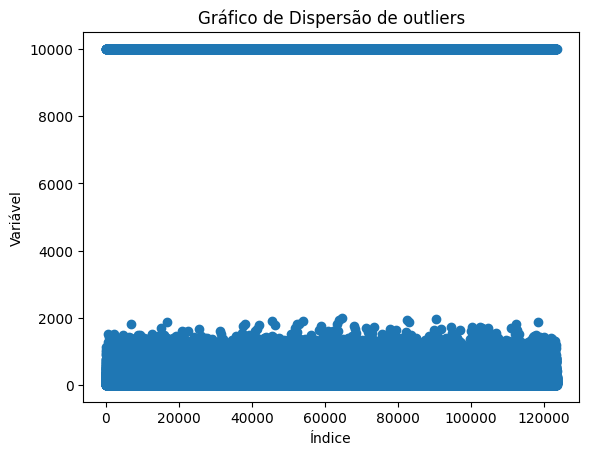

In [ ]:
plt.scatter(range(len(df['Amount_invested_monthly'])), df['Amount_invested_monthly'])
plt.title('Gráfico de Dispersão de outliers')
plt.xlabel('Índice')
plt.ylabel('Variável')
plt.show()

In [ ]:
df.loc[df['Amount_invested_monthly'] == 10000]

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
58,14,November,37,Others,25546.26,8,14,5,13.0,Standard,758.44,35.51,Yes,10000.0,High_spent_Large_value_payments,359.89,NaN
62,15,November,31,Scientist,31993.78,6,7,2,14.0,Standard,818.22,27.96,Yes,10000.0,High_spent_Medium_value_payments,388.61,NaN
112,28,September,41,Architect,28572.39,6,15,3,10.0,Standard,400.07,32.23,Yes,10000.0,Low_spent_Large_value_payments,217.06,NaN
156,39,September,19,Developer,66567.32,5,5,2,15.0,Standard,233.79,26.46,No,10000.0,High_spent_Large_value_payments,623.29,NaN
162,40,November,33,Media_Manager,12909.90,5,13,0,14.0,Standard,602.50,37.17,No,10000.0,Low_spent_Medium_value_payments,341.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99860,12482,May,43,Architect,10692.16,8,16,0,12.0,Standard,1350.85,27.94,Yes,10000.0,Low_spent_Medium_value_payments,284.06,Standard
99874,12484,March,27,Scientist,118677.54,4,6,4,11.0,Standard,995.47,32.81,No,10000.0,High_spent_Medium_value_payments,751.61,Good
99879,12484,August,27,Scientist,118677.54,4,6,4,11.0,Good,995.47,39.75,No,10000.0,High_spent_Medium_value_payments,801.75,Good
99951,12493,August,33,Media_Manager,59146.36,3,6,1,6.0,Good,418.03,27.68,No,10000.0,Low_spent_Large_value_payments,389.49,Standard


Mesmos clientes investem a mesma quantia mensalmente.

In [ ]:
df['Monthly_Balance'].describe().round(2)
#df['Payment_of_Min_Amount'].value_counts()

count    123420.00
mean        397.90
std         217.05
min           0.00
25%         268.08
50%         334.64
75%         467.95
max        1606.52
Name: Monthly_Balance, dtype: float64

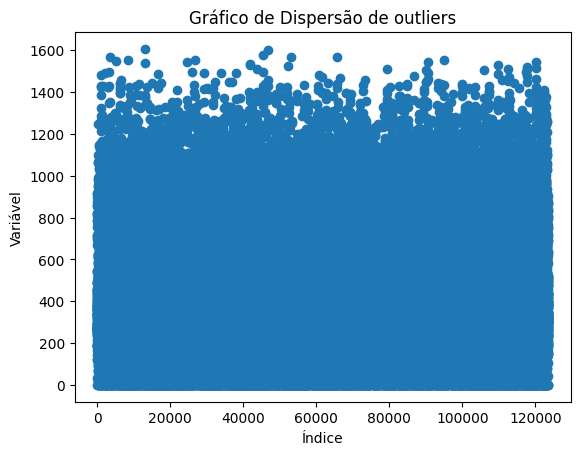

In [ ]:
plt.scatter(range(len(df['Monthly_Balance'])), df['Monthly_Balance'])
plt.title('Gráfico de Dispersão de outliers')
plt.xlabel('Índice')
plt.ylabel('Variável')
plt.show()

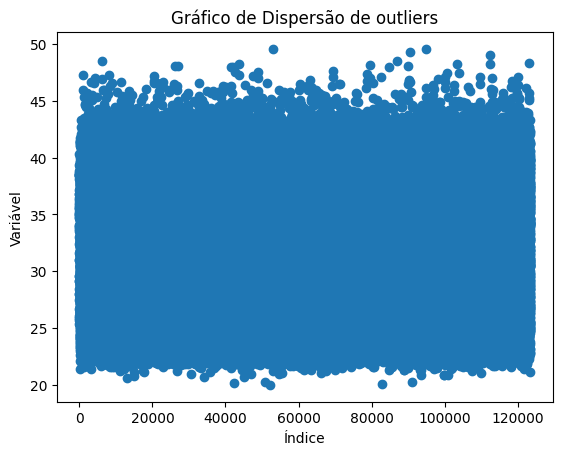

In [ ]:
plt.scatter(range(len(df['Credit_Utilization_Ratio'])), df['Credit_Utilization_Ratio'])
plt.title('Gráfico de Dispersão de outliers')
plt.xlabel('Índice')
plt.ylabel('Variável')
plt.show()

In [ ]:
df.sample(3)

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7433,929,February,25,Journalist,58940.76,5,18,6_,18.0,Standard,348.70,35.93,Yes,109.06,High_spent_Small_value_payments,400.22,Standard
43644,5455,May,23,Media_Manager,9691.01,8,18,9,20.0,Bad,3416.97,37.64,Yes,30.45,Low_spent_Large_value_payments,234.85,Standard
43521,10880,October,51,Musician,52410.50,7,2,0,8.0,Good,1147.16,30.88,No,182.86,High_spent_Medium_value_payments,532.20,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123420 entries, 0 to 99998
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               123420 non-null  int64  
 1   Month                     123420 non-null  object 
 2   Age                       123420 non-null  int64  
 3   Occupation                123420 non-null  object 
 4   Annual_Income             123420 non-null  float64
 5   Num_Bank_Accounts         123420 non-null  int64  
 6   Interest_Rate             123420 non-null  int64  
 7   Num_of_Loan               123420 non-null  int64  
 8   Num_of_Delayed_Payment    123420 non-null  float64
 9   Credit_Mix                123420 non-null  object 
 10  Outstanding_Debt          123420 non-null  float64
 11  Credit_Utilization_Ratio  123420 non-null  float64
 12  Payment_of_Min_Amount     123420 non-null  object 
 13  Amount_invested_monthly   123420 non-null  fl

In [ ]:
df.to_csv('EDA_data.csv')

Agora, com os dados tratados e salvos podemos iniciar a análise.

### **2. ANALISE DOS DADOS**

Os dados serão extraidos via python e, no medium, será postado a análise de alguns valores.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/Credit Analysis/df.csv', low_memory=False)

Algumas bibliotecas para analise de dados

In [ ]:
#!pip install summarytools
from summarytools import dfSummary
dfSummary(df,is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Unnamed: 0[int64],Mean (sd) : 42979.8 (28017.1)min < med < max:0.0 < 38956.5 < 99998.0IQR (CV) : 45788.2 (1.5),"83,899 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACTUlEQVR4nO3cO4/aUBRF4XNhQOYRWzwCnZuUkVJYoqFJl3J+bNr0g5SaIk0qGoSEjBHOICzHKaM0Gfwgw1bW1x/fi7RAuDmuKAoD7l3rtS8AXOPhlg93zvXMrFvjEZeiKJ6bug90vRhqjdi88Xj8KQiCQYVZMzM7HA4n59wXMztXGG+Z2c+qZ9ec5wvWsL+G6pzrTSaTR9/3R2UfnGWZZ2bvF4vF1+l0eiw7v91u36xWq49hGE7b7XapUPM876Rp+m44HH5vtVpZ2bPrzh+Px9g595lYm/PSL2rX9/3Rcrl8DoKgVCybzWa0Xq/7nudls9nsR9mLxXHc8zyvH0XReT6fxxXOfhtF0beys3XnkyTxnp6eRvv9vmtmhNqQq/6jBkFwLhtbHMe9alf602AwqHx2ldkm5s2skc+O33jrhwRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYSbbvP7X+V53jEz3zlXZfw1l7vd7WI5Qm1YmqadLMs+hGHYVlrudu+L5Qi1YZfL5UFxudu9L5Yj1BtRW+5274vleJmCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFhKs2TidJ4pV98Ol08szM0jT1drtd/1/Oq56teu+689f09Qt0N0rVBTpiawAAAABJRU5ErkJggg=="">",0(0.0%)
2,Customer_ID[int64],Mean (sd) : 6371.9 (3606.2)min < med < max:0.0 < 6481.0 < 12499.0IQR (CV) : 6248.0 (1.8),"12,500 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACNklEQVR4nO3Zv27aUBiG8e+4CToEZIs/hQvomA2JhQvo2IvtJXRg6MzQpRMbErKMcGPVGHdpt5BgToh5q+e3ko9j6TxKPiuurmsDbl3U9gMA57hr+wFwO5xzXTPrBHxFZGbHC2d/13X9dOpDQr2CwAsPueyQeT8cDj8nSdK75NCqqu7zPP/U7/d/RlFUNp3f7Xapc+7rqVgJ9Y0557qj0ehLHMeDprOhlx0yX5alN7PH+Xz+fTwe75qevV6vB6vV6uNsNvsxnU7TJrNZlvnlcjnYbrcdMyPUd9KJ43iwWCyekiQpmgyGXHbo/N/ZB+99OZlMfjU9O03TrplZr9crLpk3s+5LHxLqlSRJ0vjCQi87ZP7f7K26aqgtL+dt7Xrx8Xi8DzgXz3g11IDYWlvO2971qqp6LIrim5ld8icQz3gx1JAXgzaX81vY9Q6Hw4em5+K0136jhr4YtLKcs+v9f87aUUNeDIC3wL9QIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIeHunB/Kssw3/eL9fu/NzPI895vN5uE951XPVn3u0Plz+voDx204p0DSxVYAAAAASUVORK5CYII="">",0(0.0%)
3,Month[object],1. July2. May3. March4. February5. August6. June7. April8. January9. November10. September11. other,"10,573 (8.6%)10,503 (8.5%)10,481 (8.5%)10,479 (8.5%)10,474 (8.5%)10,472 (8.5%)10,462 (8.5%)10,455 (8.5%)9,906 (8.0%)9,890 (8.0%)19,725 (16.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADlklEQVR4nO3dMWobQQCG0VEQJm4khMGH8SFy2BxCtxHGW8TGjVIEQ0rPGH8B573aC1t8rNhl/mR3vV4HFL796xvg/yE2MmIjIzYyYiMjNjJiIyM2MmIjsxtj3I4xbiave71er8+fcD98Yfu7u7sfh8PhNHPRtm2Pu93up+CYsT8cDqeHh4fn4/H48p4Lnp6evp/P59PlcrkZY4iNd9uPMcbxeHy5v7//NXHd7SfdD1+YFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOzH+PPGbX3XjDzt/C3/bZtj+fz+TQmzqht2/Y4xnj9vNviK7JBILPzT2ZR8WQjY11FxrqKjHUVGR91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNYOBmDFzKebGQMXsgYvJAxeCHjoy4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHAsnY/BCxgsCGT+jZKyryFhXkbGuIuMFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjKOhZOxriLjyUbG4IWMwQsZgxcyPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZDzZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6iowNAhnrKjKebGSsq8hYV5GxriLjoy4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHAsnY/BCxpONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxj4WQMXsh4QSCz8jPqJ5Ql0+sqyypWTa2rLKv4iJV1lWUVS7wgkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkZlaV1lW8RHT6yrLKlY5Fk7GuoqMJxsZgxcyBi9kDF7I+KhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjMELGcfCyRi8kFn9j9JmeRoyP3hZYSTDGJODlxVGMrxZGbysMJLBR106YiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzY

In [ ]:
#!pip install sidetable
import sidetable
df.stb.freq(['Month'], style=True)

In [ ]:
#!pip install pivottablejs
from pivottablejs import pivot_ui
pivot_ui(df)

In [ ]:
# Separando o dataset por cliente
cliente = df.drop_duplicates(subset='Customer_ID')
cliente.head(5)

,Unnamed: 0,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0,September,23,Scientist,19114.12,3,3,4,7.0,Good,809.98,35.03,No,236.64,Low_spent_Small_value_payments,186.27,NaN
3,4,1,September,28,Others,34847.84,2,6,1,1.0,Good,605.03,25.93,No,39.68,High_spent_Large_value_payments,485.30,NaN
5,8,2,September,35,Engineer,143162.64,1,8,3,1942.0,Good,1303.01,35.23,No,397.50,Low_spent_Medium_value_payments,854.23,NaN
8,12,3,September,55,Entrepreneur,30689.89,2,4,1,6.0,Good,632.46,39.38,No,69.11,High_spent_Medium_value_payments,425.73,NaN
12,17,4,October,22,Developer,35547.71,7,5,0,18.0,Standard,943.86,31.65,Yes,113.45,High_spent_Medium_value_payments,421.88,NaN


In [ ]:
cliente.describe().round(2)

,Unnamed: 0,Customer_ID,Age,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Monthly_Balance
count,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00
mean,25034.18,6249.50,33.71,79620.78,16.94,14.63,3.40,32.70,1426.22,32.27,595.45,397.47
std,14491.29,3608.58,10.76,445556.03,117.89,8.69,2.49,220.88,1155.17,5.12,1971.05,216.42
min,0.00,0.00,14.00,7005.93,0.00,1.00,0.00,0.00,0.23,20.74,0.00,0.00
25%,12511.00,3124.75,25.00,19396.31,3.00,8.00,1.00,9.00,566.07,28.00,67.78,267.55
50%,25022.50,6249.50,33.00,37250.76,6.00,13.00,3.00,15.00,1166.16,32.24,128.91,334.80
75%,37533.75,9374.25,42.00,72281.43,7.00,20.00,5.00,19.00,1945.96,36.52,254.74,468.42
max,95496.00,12499.00,56.00,9976017.00,1798.00,34.00,9.00,4374.00,4998.07,48.07,10000.00,1606.52


In [ ]:
# Descobrir a quantos clientes solicitaram emprestimo
cliente.loc[cliente['Num_of_Loan'] !=0].describe()

,Unnamed: 0,Customer_ID,Age,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Monthly_Balance
count,10661.000000,10661.000000,10661.000000,1.066100e+04,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000
mean,24996.314323,6238.997092,33.330832,7.746999e+04,15.992684,15.303630,3.988369,34.634650,1507.609253,32.158615,591.300860,377.809219
std,14483.565704,3604.429221,10.638095,4.418604e+05,112.156752,8.825801,2.224091,230.562718,1189.710878,5.090999,1975.044884,199.640203
min,0.000000,0.000000,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,0.230000,20.740000,0.000000,0.000000
25%,12504.000000,3121.000000,25.000000,1.885460e+04,4.000000,8.000000,2.000000,10.000000,600.730000,27.880000,66.360000,261.400000
50%,24948.000000,6230.000000,33.000000,3.617894e+04,6.000000,15.000000,4.000000,15.000000,1244.360000,32.080000,125.640000,322.430000
75%,37472.000000,9358.000000,42.000000,6.978808e+04,8.000000,21.000000,6.000000,20.000000,2130.220000,36.410000,244.480000,442.000000
max,95496.000000,12499.000000,56.000000,9.976017e+06,1798.000000,34.000000,9.000000,4374.000000,4998.070000,45.990000,10000.000000,1490.360000


In [ ]:
# Descobrir a media de dias em que atrasam os pagamentos
cliente.loc[cliente['Num_of_Delayed_Payment'] !=0].describe()

,Unnamed: 0,Customer_ID,Age,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Monthly_Balance
count,12228.000000,12228.000000,12228.000000,1.222800e+04,12228.000000,12228.000000,12228.000000,12228.000000,12228.000000,12228.000000,12228.000000,12228.000000
mean,25045.663477,6252.171001,33.618907,7.945971e+04,16.716798,14.795960,3.435476,33.430324,1440.784895,32.260904,596.567006,395.367214
std,14486.871399,3607.163923,10.734299,4.495350e+05,116.354693,8.693117,2.500970,223.267193,1161.823246,5.119435,1977.267999,214.730942
min,0.000000,0.000000,14.000000,7.005930e+03,0.000000,1.000000,0.000000,1.000000,0.230000,20.740000,0.000000,0.000000
25%,12539.000000,3130.750000,25.000000,1.926724e+04,4.000000,8.000000,1.000000,10.000000,573.150000,27.997500,67.477500,266.950000
50%,25022.500000,6249.500000,33.000000,3.694463e+04,6.000000,14.000000,3.000000,15.000000,1175.740000,32.210000,128.270000,332.950000
75%,37549.000000,9378.250000,42.000000,7.169757e+04,8.000000,20.000000,5.000000,19.000000,1976.857500,36.520000,251.037500,465.802500
max,95496.000000,12499.000000,56.000000,9.976017e+06,1798.000000,34.000000,9.000000,4374.000000,4998.070000,48.070000,10000.000000,1606.520000


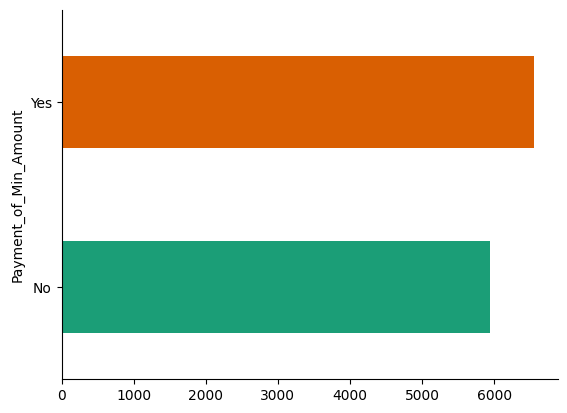

In [ ]:
# @title Payment_of_Min_Amount

from matplotlib import pyplot as plt
import seaborn as sns
cliente.groupby('Payment_of_Min_Amount').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

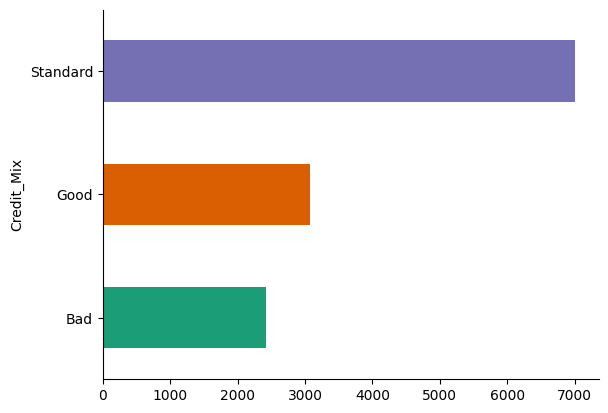

In [ ]:
# @title Credit_Mix

from matplotlib import pyplot as plt
import seaborn as sns
cliente.groupby('Credit_Mix').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

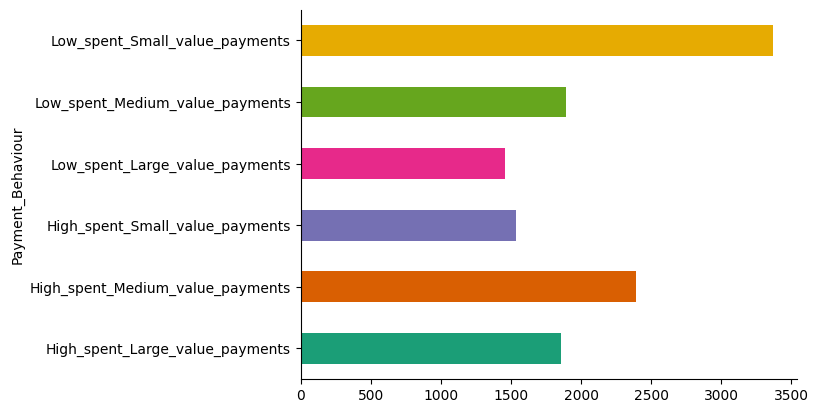

In [ ]:
# @title Payment_Behaviour

from matplotlib import pyplot as plt
import seaborn as sns
cliente.groupby('Payment_Behaviour').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Num of Delayed Payments vs Num of Loans


<Axes: xlabel='Num_of_Loan', ylabel='Num_of_Delayed_Payment'>

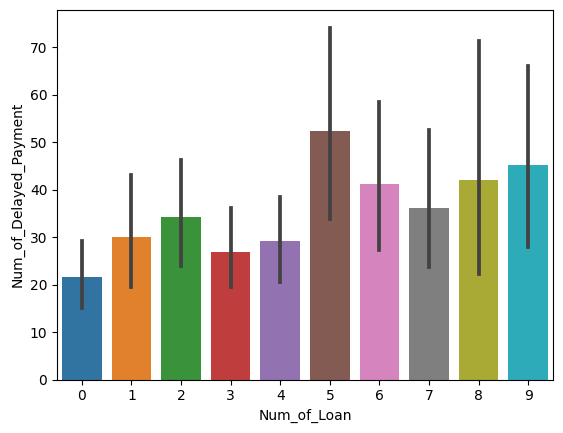

In [ ]:
# @title Num of Delayed Payments vs Num of Loans

sns.barplot(x = 'Num_of_Loan', y = 'Num_of_Delayed_Payment', data = cliente)

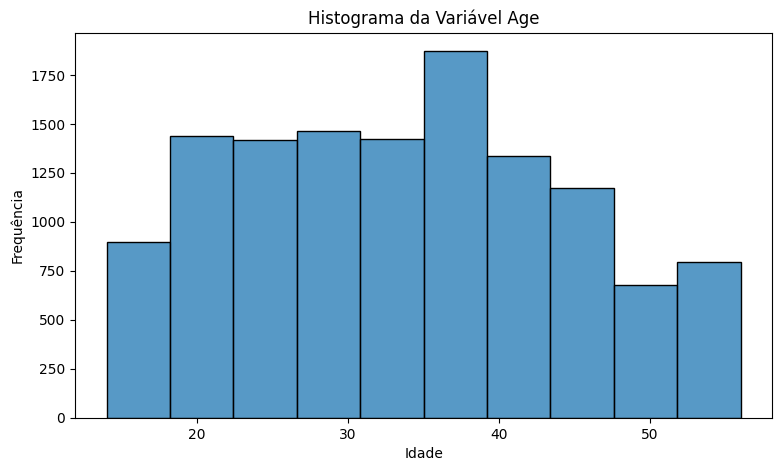

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar histograma da variável 'Age'
plt.figure(figsize=(9, 5))  # Define o tamanho da figura
sns.histplot(data=cliente, x='Age', bins=10)
plt.title('Histograma da Variável Age')
plt.xlabel('Idade')  # Adiciona um rótulo ao eixo x
plt.ylabel('Frequência')  # Adiciona um rótulo ao eixo y
plt.grid(False)  # Adiciona grades ao gráfico
plt.show()  # Mostra o gráfico

In [ ]:
# Distribuição da categoria crédito
cliente.stb.freq(['Credit_Mix'], style=True)

,Credit_Mix,count,percent,cumulative_count,cumulative_percent
0,Standard,"7,010",56.08%,"7,010",56.08%
1,Good,"3,075",24.60%,"10,085",80.68%
2,Bad,"2,415",19.32%,"12,500",100.00%


In [ ]:
#Quantidade de pagamentos com algum atraso
cliente.stb.freq(['Payment_Behaviour'], style=True)

,Payment_Behaviour,count,percent,cumulative_count,cumulative_percent
0,Low_spent_Small_value_payments,"3,370",26.96%,"3,370",26.96%
1,High_spent_Medium_value_payments,"2,389",19.11%,"5,759",46.07%
2,Low_spent_Medium_value_payments,"1,891",15.13%,"7,650",61.20%
3,High_spent_Large_value_payments,"1,854",14.83%,"9,504",76.03%
4,High_spent_Small_value_payments,"1,539",12.31%,"11,043",88.34%
5,Low_spent_Large_value_payments,"1,457",11.66%,"12,500",100.00%


In [ ]:
#Quantidade de pagamentos com algum atraso
cliente.stb.freq(['Payment_of_Min_Amount'], style=True)

,Payment_of_Min_Amount,count,percent,cumulative_count,cumulative_percent
0,Yes,"6,552",52.42%,"6,552",52.42%
1,No,"5,948",47.58%,"12,500",100.00%


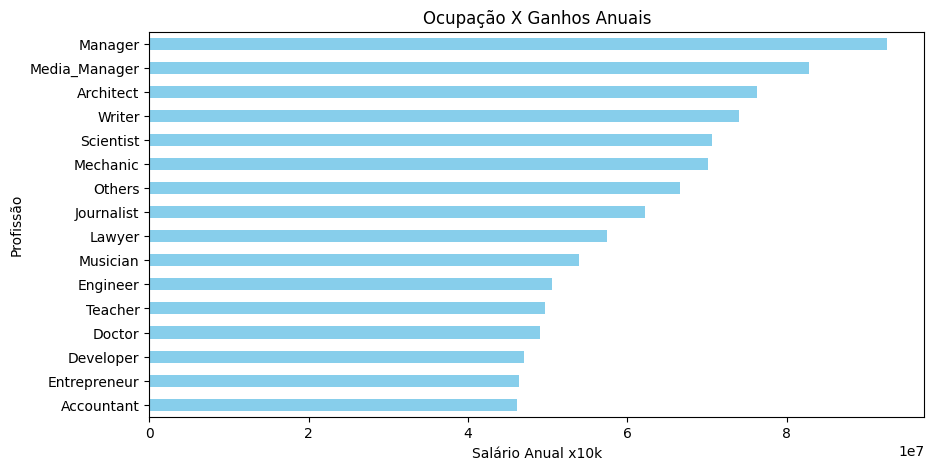

In [ ]:
# OCupação x Salarios
# Horario com mais demanda por pedidos
top_cl = cliente.groupby('Occupation')['Annual_Income'].sum()
top_cl = top_cl.sort_values(ascending=True).head(20)

import matplotlib.pyplot as plt
# Gráfico dos TOP 10 por volume de produtos
plt.figure(figsize=(10,5))
top_cl.plot(kind='barh', color='skyblue')
plt.title('Ocupação X Ganhos Anuais')
plt.xlabel('Salário Anual x10k')
plt.ylabel('Profissão')
#plt.grid(axis='x', color='gray')
plt.show();

In [ ]:
# Profissões dos clientes - TOP10
cliente.stb.freq(['Occupation'], style=True)

,Occupation,count,percent,cumulative_count,cumulative_percent
0,Others,869,6.95%,869,6.95%
1,Lawyer,833,6.66%,"1,702",13.62%
2,Developer,797,6.38%,"2,499",19.99%
3,Engineer,795,6.36%,"3,294",26.35%
4,Mechanic,792,6.34%,"4,086",32.69%
5,Architect,790,6.32%,"4,876",39.01%
6,Media_Manager,783,6.26%,"5,659",45.27%
7,Entrepreneur,778,6.22%,"6,437",51.50%
8,Accountant,774,6.19%,"7,211",57.69%
9,Teacher,773,6.18%,"7,984",63.87%


In [ ]:
df.head(4)

,Unnamed: 0,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0,September,23,Scientist,19114.12,3,3,4,7.0,Good,809.98,35.03,No,236.64,Low_spent_Small_value_payments,186.27,NaN
1,1,0,October,24,Scientist,19114.12,3,3,4,9.0,Good,809.98,33.05,No,21.47,High_spent_Medium_value_payments,361.44,NaN
2,3,0,December,24,Scientist,19114.12,3,3,4,5.0,Good,809.98,32.43,No,39.08,High_spent_Medium_value_payments,343.83,NaN
3,4,1,September,28,Others,34847.84,2,6,1,1.0,Good,605.03,25.93,No,39.68,High_spent_Large_value_payments,485.30,NaN


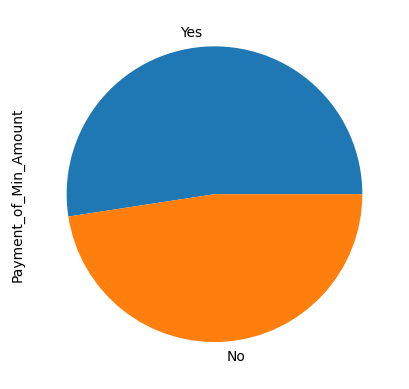

In [ ]:
cliente['Payment_of_Min_Amount'].value_counts().plot(kind='pie');

In [ ]:
#df.loc[df['Annual_Income'] < 10000].describe()
df.loc[df['Annual_Income'] > 200000].describe()

,Unnamed: 0,Customer_ID,Age,Annual_Income,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Amount_invested_monthly,Monthly_Balance
count,505.000000,505.000000,505.00000,5.050000e+02,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,41272.736634,6391.944554,32.99604,5.137277e+06,19.582178,14.229703,3.243564,24.427723,1340.256792,32.519743,658.651069,398.135030
std,27923.973358,3661.330339,10.85346,2.872279e+06,121.050272,8.501559,2.498032,179.110166,1163.527220,5.001242,2099.547357,205.520429
min,15.000000,3.000000,14.00000,2.507380e+05,0.000000,1.000000,0.000000,0.000000,0.560000,21.980000,0.000000,0.000000
25%,18550.000000,3194.000000,24.00000,2.597096e+06,3.000000,7.000000,1.000000,9.000000,451.780000,28.510000,69.830000,269.690000
50%,35762.000000,6519.000000,32.00000,5.296626e+06,5.000000,12.000000,3.000000,14.000000,1036.190000,32.610000,124.470000,341.610000
75%,63213.000000,9422.000000,41.00000,7.679376e+06,7.000000,20.000000,5.000000,19.000000,1847.520000,36.620000,257.740000,469.890000
max,99721.000000,12465.000000,56.00000,9.976017e+06,1462.000000,34.000000,9.000000,3878.000000,4983.860000,44.490000,10000.000000,1245.740000


In [ ]:
 parc = df['Outstanding_Debt'].max()
 print(f'O valor de maior parcela de empréstimo foi de ${parc}.')

O valor de maior parcela de empréstimo foi de $4998.07.


In [ ]:
df['Credit_Utilization_Ratio'].describe().round(2)

count    123420.00
mean         32.27
std           5.11
min          20.00
25%          28.05
50%          32.29
75%          36.48
max          49.56
Name: Credit_Utilization_Ratio, dtype: float64

In [ ]:
saldo = df['Monthly_Balance'].sum().round(2)
print(f'Saldo total em conta após pagamentos de dividas e retiradas ${saldo}')

Saldo total em conta após pagamentos de dividas e retiradas $49106990.94


In [ ]:
inv = df['Amount_invested_monthly'].sum().round(2)
print(f'Quantia investida no período ${inv}.')

Quantia investida no período $75416406.61.


Não é especificado em qual produto o cliente investe ou a taxa de lucro ou valores de qualquer tipo de imposto neste df.

In [ ]:
solvencia = cliente['Annual_Income'].sum().round(2)
print(f'Os clientes recebem anualmente ${solvencia} neste banco')

Os clientes recebem anualmente $995259695.08 neste banco


In [ ]:
div = df['Outstanding_Debt'].sum().round(2)
print(f'Os clientes tomaram ${div} em empréstimo neste banco')

Os clientes tomaram $176048238.73 em empréstimo neste banco


In [ ]:
deb = ((div/solvencia)*100).round(2)
print(f'Os valores transacionados neste banco referente aos emprestimos representam {deb}% do valor movimentados pelos clientes')

Os valores transacionados neste banco referente aos emprestimos representam 17.69% do valor movimentados pelos clientes


In [ ]:
juros = ((df['Interest_Rate']/100 ) * df['Outstanding_Debt']).sum().round(2)
print(f'O banco tem a receber ${juros} referente as parcelas das dividas dos clientes')

O banco tem a receber $33474935.4 referente as parcelas das dividas dos clientes


In [ ]:
df.groupby('Month')['Monthly_Balance'].sum()

Month
April        4162530.32
August       4168625.23
December     3929415.23
February     4147185.59
January      4205170.85
July         4197288.33
June         4165451.64
March        4163978.41
May          4147624.22
November     3938480.14
October      3942282.17
September    3938958.81
Name: Monthly_Balance, dtype: float64

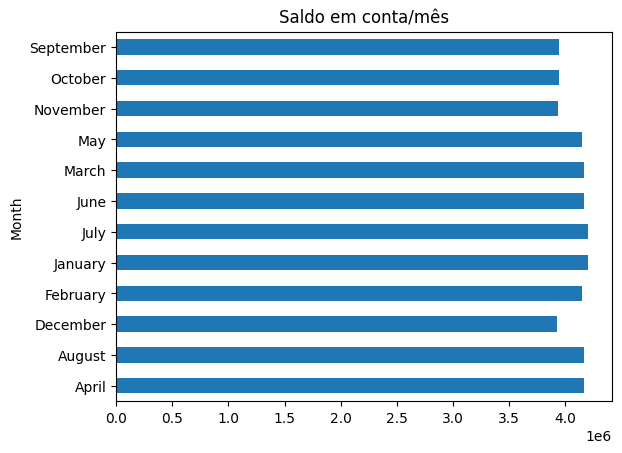

In [ ]:
df.groupby('Month')['Monthly_Balance'].sum().plot(kind='barh', title='Saldo em conta/mês');

In [ ]:
df.groupby('Month')['Amount_invested_monthly'].sum()

Month
April        6261878.60
August       6347554.48
December     5759162.44
February     6051439.41
January      6555494.35
July         6447685.61
June         6306070.71
March        6689532.51
May          6527147.69
November     6429990.33
October      6041984.41
September    5998466.07
Name: Amount_invested_monthly, dtype: float64

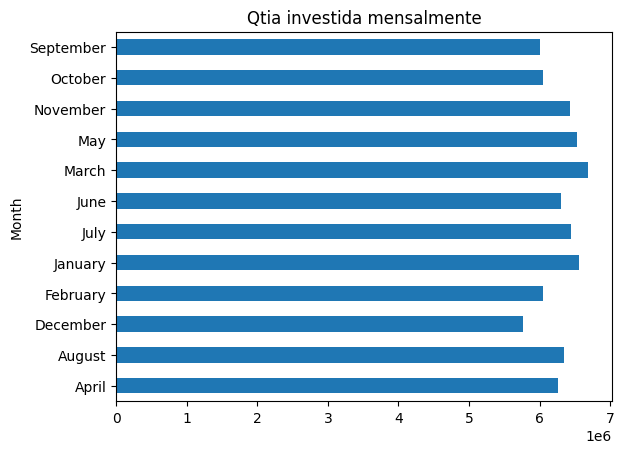

In [ ]:
df.groupby('Month')['Amount_invested_monthly'].sum().plot(kind='barh', title='Qtia investida mensalmente');

In [ ]:
df.groupby('Month')['Outstanding_Debt'].sum()

Month
April        14884822.16
August       14937171.09
December     14125881.33
February     14960726.38
January      14846711.11
July         15011263.96
June         14956117.39
March        14979365.44
May          14986398.54
November     14243026.43
October      14050082.47
September    14066672.43
Name: Outstanding_Debt, dtype: float64